# Building a Logistic Regression Classification Model

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [2]:
#Load the dataset

data=pd.read_csv('HR_comma_sep.csv')

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Checking the Missing Values

In [6]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [43]:
df=data

In [44]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>, <Axes: >]],
      dtype=object)

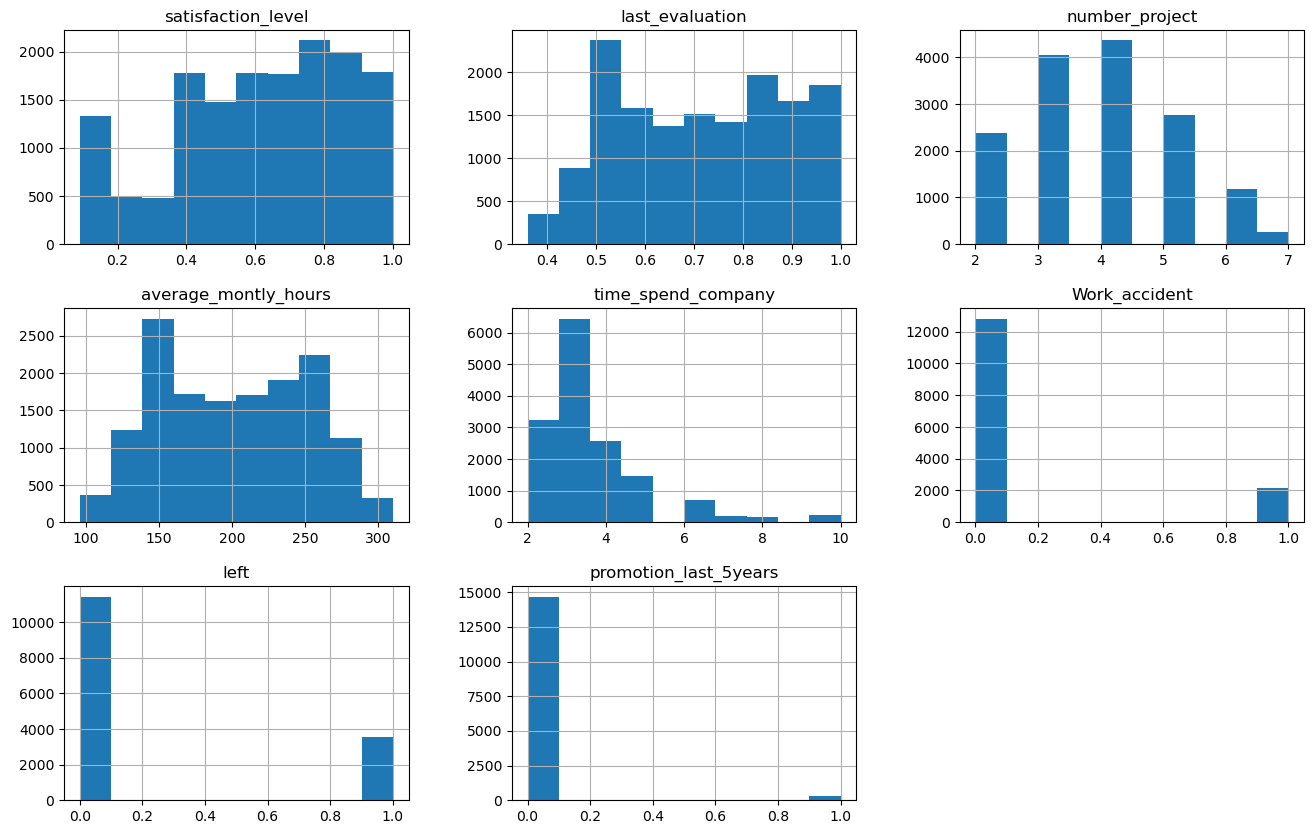

In [49]:
df.hist(figsize=(16,10))

<Axes: xlabel='salary'>

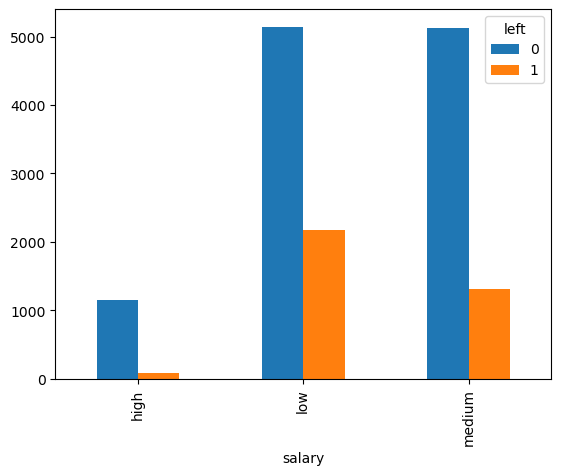

In [50]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [51]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [52]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [53]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [54]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0


In [55]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,1,0
1,0.80,262,0,1,0,0,1
2,0.11,272,0,1,0,0,1
3,0.72,223,0,1,0,1,0
4,0.37,159,0,1,0,1,0


In [68]:
x = df_with_dummies.drop(['left'],axis=1)
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [69]:
y = df_with_dummies.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3)

In [71]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [72]:
model.fit(x_train, y_train)

C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
ypred = model.predict(x_test)

In [74]:
model.score(x_test,y_test)

0.7795238095238095

In [75]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(y_test, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(y_test,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(y_test,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.7795238095238095

Confusion Matrix:
 [[7542  464]
 [1851  643]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      8006
           1       0.58      0.26      0.36      2494

    accuracy                           0.78     10500
   macro avg       0.69      0.60      0.61     10500
weighted avg       0.75      0.78      0.75     10500



In [76]:
y_probs = model.predict_proba(x_test)[:,1]
y_probs

array([0.36020825, 0.21839619, 0.61237295, ..., 0.06408403, 0.13326248,
       0.18923707])

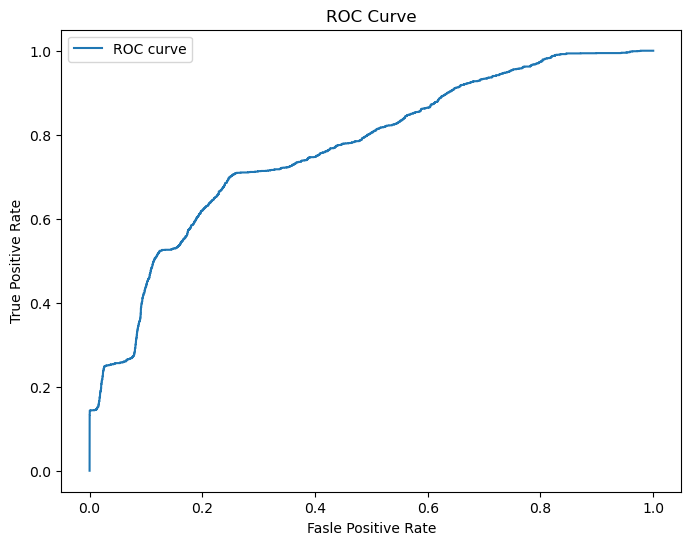

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Calculate ROC & AUC
fpr, tpr, thresholds=roc_curve(y_test,y_probs)
roc_curve=auc(fpr,tpr)
#Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
roc_curve

0.7661626474610762

In [79]:
cm = confusion_matrix(y_test,ypred)
cm

array([[7542,  464],
       [1851,  643]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

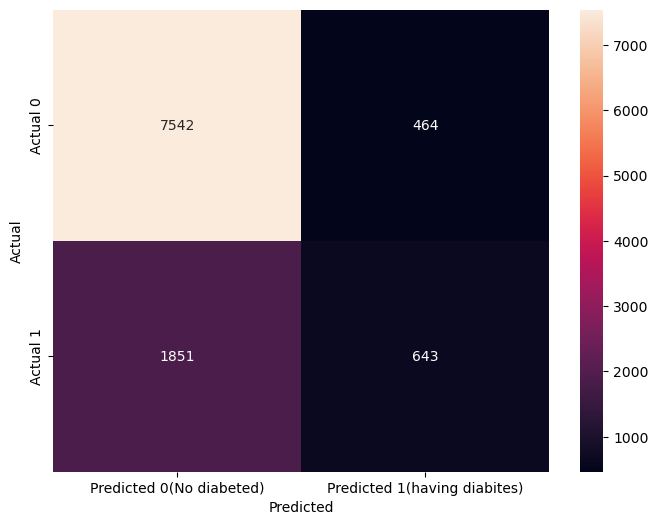

In [80]:
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0(No diabeted)','Predicted 1(having diabites)'] ,yticklabels=["Actual 0", "Actual 1"]) 

plt.xlabel('Predicted')

plt.ylabel("Actual")

In [81]:
df_with_dummies.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

# UPSAMPLING

In [82]:
df_major = df_with_dummies[df_with_dummies.left==0]
df_minor = df_with_dummies[df_with_dummies.left==1]

In [83]:
df_major.shape,df_minor.shape

((11428, 7), (3571, 7))

In [84]:
from sklearn.utils import resample

In [85]:
df_minor_upsampled = resample(df_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=11428,    # to match majority class
                                 random_state=123) 

In [86]:
df_upsampled = pd.concat([df_major, df_minor_upsampled])

In [87]:
df_upsampled.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
2000,0.58,215,0,0,0,1,0
2001,0.82,202,0,0,0,1,0
2002,0.45,193,0,0,0,1,0
2003,0.78,247,0,0,0,1,0
2004,0.49,214,0,0,0,1,0


In [88]:
df_upsampled['left'].value_counts()

0    11428
1    11428
Name: left, dtype: int64

In [89]:
x=df_upsampled.iloc[:,:-1]
y=df_upsampled.iloc[:,-1:].values

In [90]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)

print('***************Training Data Shape...............****\n')

print('Training data-X- Shape: \t',xtrain.shape)

print()

print('Training data-y- Shape: \t', ytrain.shape)

print()

print('***************Testing Data Shape*******************\n')

print('Testing data(x-Input) Shape: \t', xtest.shape)

print()

print('Testing data(y-Outcome) Shape:\t',ytest.shape)

***************Training Data Shape...............****

Training data-X- Shape: 	 (17142, 6)

Training data-y- Shape: 	 (17142, 1)

***************Testing Data Shape*******************

Testing data(x-Input) Shape: 	 (5714, 6)

Testing data(y-Outcome) Shape:	 (5714, 1)


In [91]:
#invoke the Log reg algorithm from sklearn

log_reg=LogisticRegression(solver='liblinear', verbose=2)

#Train the model

print('Training the model\n')
log_reg.fit(xtrain, ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples: \n', ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))

Training the model

[LibLinear]Predicted Label for the input samples: 
 [0 1 0 ... 0 0 1]

Testing is completed

Testing samples are: 	 5714


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance Measures with Upsampling

In [92]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 1.0

Confusion Matrix:
 [[3413    0]
 [   0 2301]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3413
           1       1.00      1.00      1.00      2301

    accuracy                           1.00      5714
   macro avg       1.00      1.00      1.00      5714
weighted avg       1.00      1.00      1.00      5714



# ROC curve with upsampling

In [93]:
y_probs = log_reg.predict_proba(xtest)[:,1]
y_probs

array([1.55086848e-03, 9.97754268e-01, 8.37269605e-04, ...,
       1.55074860e-03, 2.45672599e-03, 9.97004702e-01])

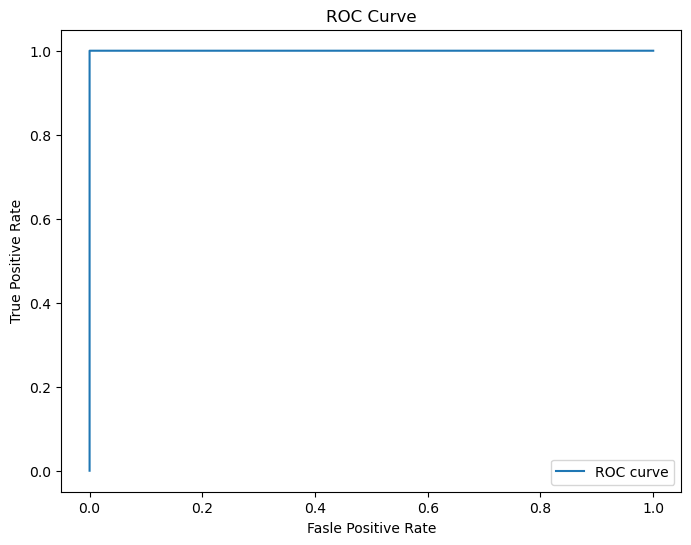

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Calculate ROC & AUC
fpr, tpr, thresholds=roc_curve(ytest,y_probs)
roc_curve=auc(fpr,tpr)
#Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [95]:
roc_curve

1.0

In [96]:
cm = confusion_matrix(ytest,ypred)

In [97]:
cm

array([[3413,    0],
       [   0, 2301]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

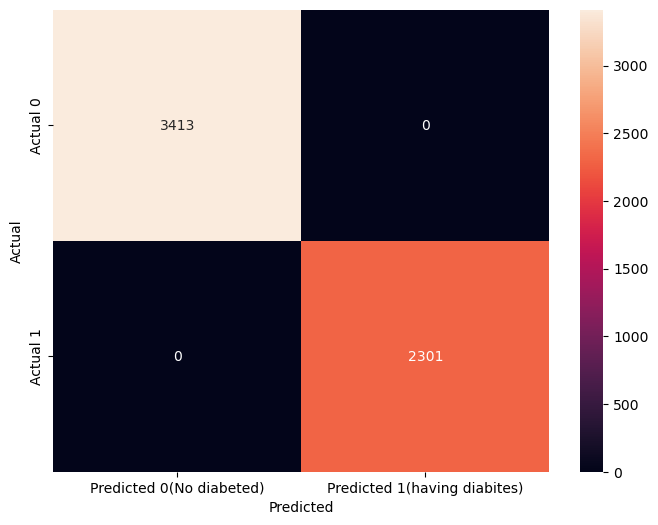

In [98]:
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0(No diabeted)','Predicted 1(having diabites)'] ,yticklabels=["Actual 0", "Actual 1"]) 

plt.xlabel('Predicted')

plt.ylabel("Actual")

# DOWNSAMPLING

In [103]:
df_major_downsampled = resample(df_major, 
                                 replace=True,    # sample without replacement
                                 n_samples=3571,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_major_downsampled, df_minor])

In [104]:
df_downsampled.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
5582,0.66,209,0,0,0,0,1
3346,0.75,220,0,0,0,0,1
7218,0.55,138,0,0,0,0,1
9763,0.39,161,0,0,0,0,1
11785,0.53,167,0,0,1,0,0


In [105]:
df_downsampled['left'].value_counts()

0    3571
1    3571
Name: left, dtype: int64

In [106]:
x=df_downsampled.iloc[:,:-1]
y=df_downsampled.iloc[:,-1:].values

In [107]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)

print('***************Training Data Shape...............****\n')

print('Training data-X- Shape: \t',xtrain.shape)

print()

print('Training data-y- Shape: \t', ytrain.shape)

print()

print('***************Testing Data Shape*******************\n')

print('Testing data(x-Input) Shape: \t', xtest.shape)

print()

print('Testing data(y-Outcome) Shape:\t',ytest.shape)

***************Training Data Shape...............****

Training data-X- Shape: 	 (5356, 6)

Training data-y- Shape: 	 (5356, 1)

***************Testing Data Shape*******************

Testing data(x-Input) Shape: 	 (1786, 6)

Testing data(y-Outcome) Shape:	 (1786, 1)


In [108]:
#invoke the Log reg algorithm from sklearn

log_reg=LogisticRegression(solver='liblinear', verbose=2)

#Train the model

print('Training the model\n')
log_reg.fit(xtrain, ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples: \n', ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))

Training the model

[LibLinear]Predicted Label for the input samples: 
 [0 1 0 ... 1 0 0]

Testing is completed

Testing samples are: 	 1786


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance measures with Downsampling

In [109]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 1.0

Confusion Matrix:
 [[1079    0]
 [   0  707]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00       707

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786



# ROC curve with downsampling

In [110]:
y_probs = log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.00264766, 0.99108479, 0.01791929, ..., 0.99293634, 0.0179513 ,
       0.03639588])

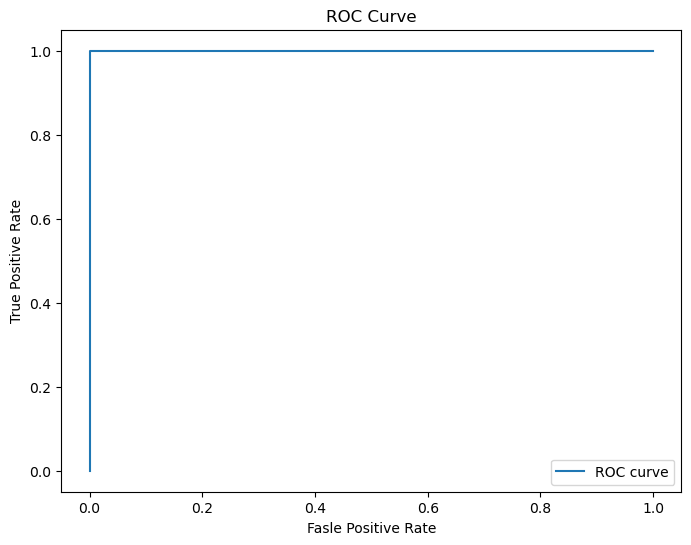

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Calculate ROC & AUC
fpr, tpr, thresholds=roc_curve(ytest,y_probs)
roc_curve=auc(fpr,tpr)
#Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [112]:
roc_curve

1.0

In [113]:
cm = confusion_matrix(ytest,ypred)
cm

array([[1079,    0],
       [   0,  707]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

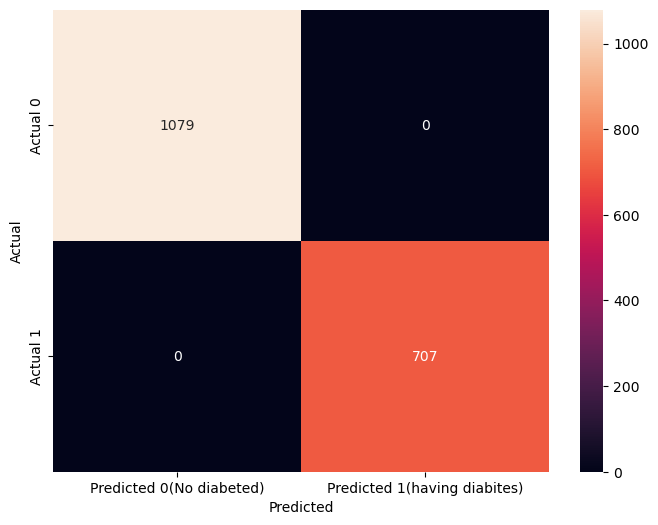

In [114]:
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0(No diabeted)','Predicted 1(having diabites)'] ,yticklabels=["Actual 0", "Actual 1"]) 

plt.xlabel('Predicted')

plt.ylabel("Actual")

# SMOTE

In [2]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain.ravel())

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)